# Data 102 Spring 2025 Lecture 4

***Note that this version of the notebook (unlike the version used in lecture) has the correct labels (FP/TP/FN/TN) on the p-value thresholding diagrams.***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lec3 import show_p_values

%matplotlib inline

sns.set()  # This helps make our plots look nicer

# These make our figures bigger
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 100

## Multiple hypothesis testing and decisions

Suppose we have a collection of $p$-values, with ground truth labels.

In [2]:
p_values_orig = pd.read_csv('pvalues.csv')
p_values = p_values_orig.copy()
p_values.head()

,pvalue,is_alternative
0,0.226410,1
1,0.053205,1
2,0.001128,1
3,0.404488,1
4,0.401786,0


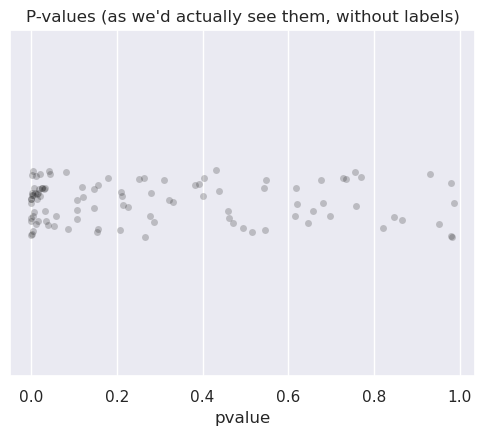

In [3]:
sns.stripplot(
    data=p_values, x='pvalue', color='black', alpha=0.2,
    #alpha = 0.8, order = [0, 1], orient = "h",
    #ax=ax
)
plt.title("P-values (as we'd actually see them, without labels)");

Text(0.5, 1.0, 'P-values, with ground truth labels')

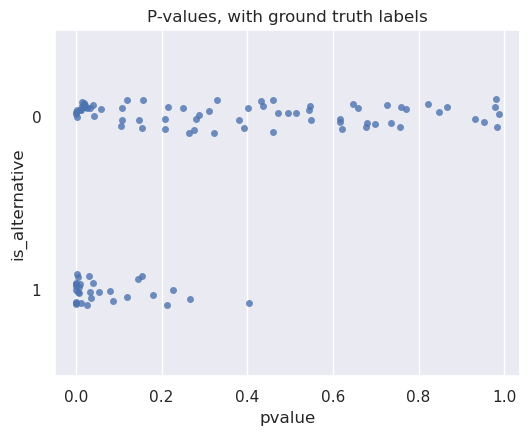

In [4]:
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], orient = "h"
)
plt.title('P-values, with ground truth labels')

Text(0.5, 1.0, 'P-values, with ground truth labels')

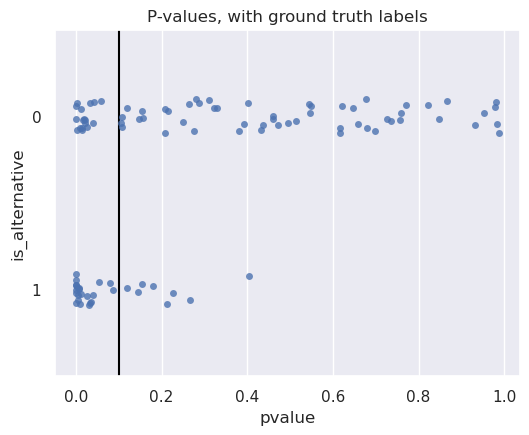

In [5]:
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], orient = "h"
)
plt.axvline(0.1, color='black')
plt.title('P-values, with ground truth labels')

***These labels are correct (unlike the ones shown live in lecture).***

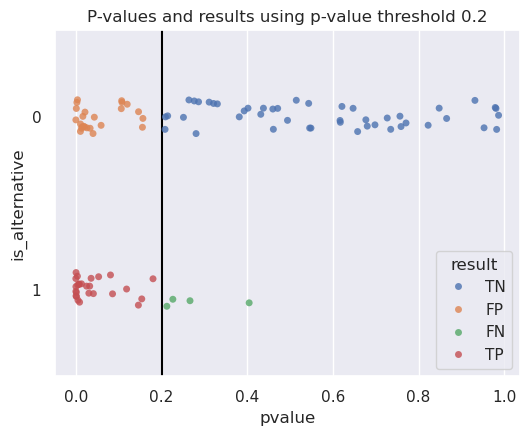

In [6]:
show_p_values(p_values, threshold=0.2, show_labels=True)

In [7]:
p_values.shape

(100, 2)

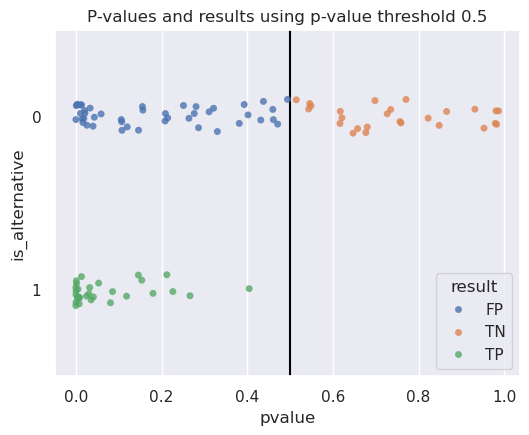

In [8]:
show_p_values(p_values, threshold=0.5, show_labels=True)

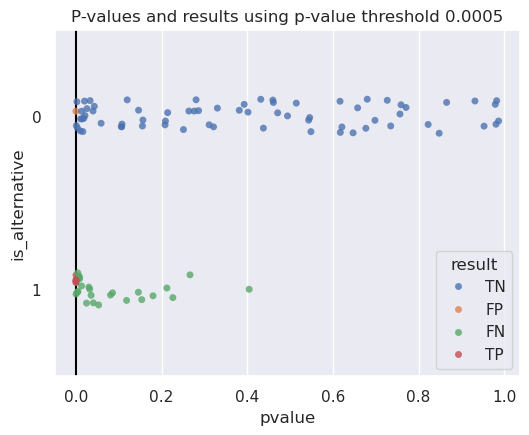

In [9]:
show_p_values(p_values, threshold=0.0005, show_labels=True)

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

In [11]:
p_values

,pvalue,is_alternative
0,0.226410,1
1,0.053205,1
2,0.001128,1
3,0.404488,1
4,0.401786,0
...,...,...
95,0.146346,0
96,0.003678,1
97,0.013303,0
98,0.493987,0


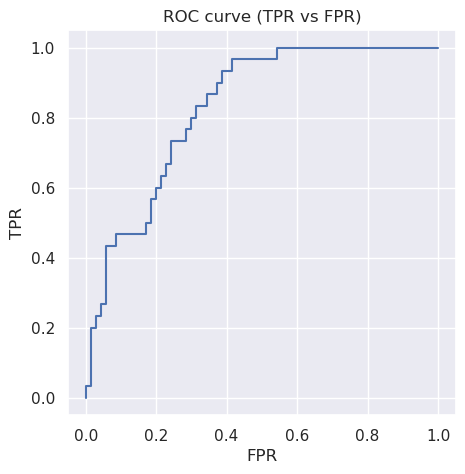

In [12]:
fpr, tpr, thresholds = roc_curve(p_values['is_alternative'], 1-p_values['pvalue'])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("ROC curve (TPR vs FPR)")
plt.show()

## Controlling FWER with Bonferroni

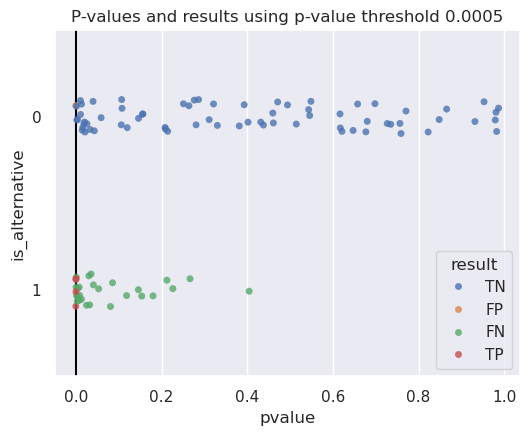

In [13]:
num_tests = p_values.shape[0]
desired_fwer = 0.05
show_p_values(p_values, threshold= desired_fwer / num_tests, show_labels=True)

## Controlling FDR with Benjamini-Hochberg

In [14]:
p_sorted = p_values_orig.sort_values('pvalue')

In [15]:
m = len(p_sorted)  # number of tests
k = np.arange(1, m+1)  # index of each test in sorted order
p_sorted['k'] = k 
p_sorted

,pvalue,is_alternative,k
94,0.000008,1,1
10,0.000109,0,2
86,0.000162,1,3
99,0.000219,1,4
42,0.000436,1,5
...,...,...,...
45,0.952674,0,96
9,0.978843,0,97
22,0.980498,0,98
76,0.982076,0,99


In [16]:
# What does this alpha mean? Is it a threshold? An FPR? A FWER? An FDR?
alpha = .05

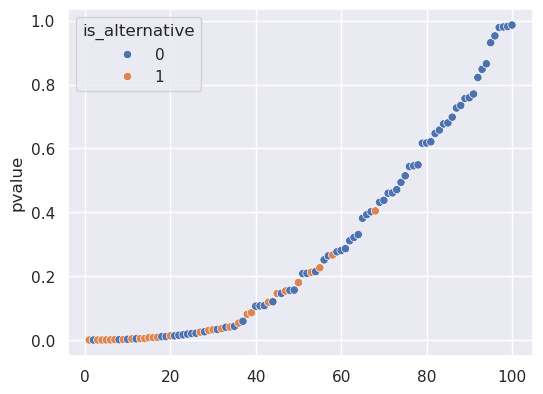

In [17]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);

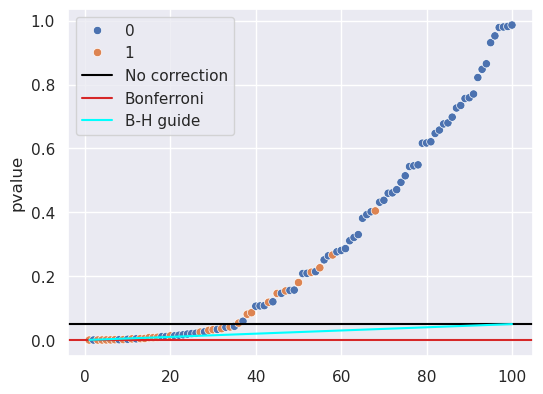

In [18]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / m, label='Bonferroni', color='tab:red')
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')
plt.legend();

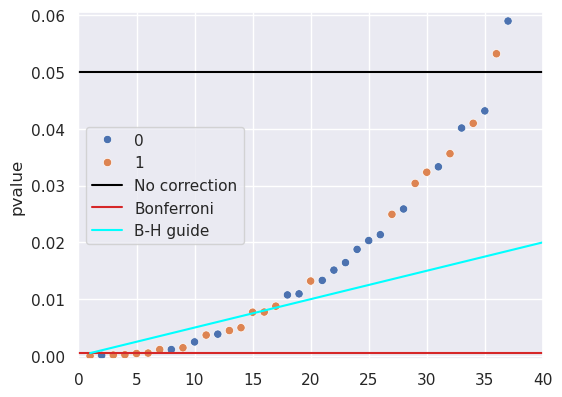

In [19]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / m, label='Bonferroni', color='tab:red')
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')

plt.axis([-0.05, 40, -0.0005, 0.0605])
plt.legend();

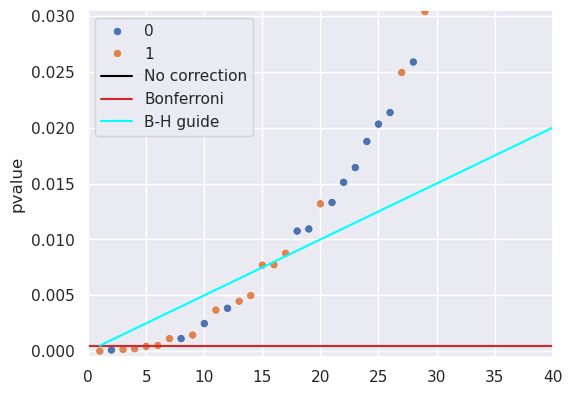

In [20]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / m, label='Bonferroni', color='tab:red')
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')

plt.axis([-0.05, 40, -0.0005, 0.0305])
plt.legend();